## Importing Libraries & getting Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/Spam SMS Collection.txt', sep='\t', names=['label', 'message'])

In [3]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Handling Missing Values

In [5]:
data.isnull().sum()

label      0
message    0
dtype: int64

## Analysing Label

In [6]:
spam_ham_counts = data.label.value_counts()
spam_ham_counts

ham     4825
spam     747
Name: label, dtype: int64

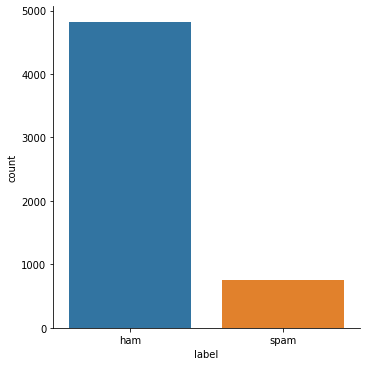

In [7]:
sns.catplot(x='label' ,data=data ,kind='count')

In [8]:
print('Spam percentage : {}'.format(spam_ham_counts[1] /float(spam_ham_counts[0] + spam_ham_counts[1]) *100))

Spam percentage : 13.406317300789663


In [9]:
data['label'] = data['label'].map({'ham':1 ,'spam':0})
data.head()

,label,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


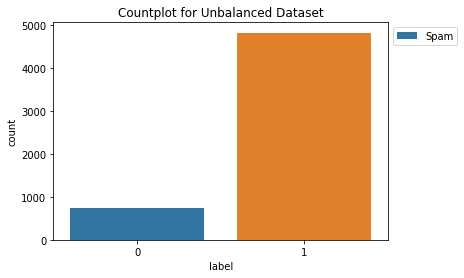

In [10]:
sns.countplot(x='label' ,data=data)
plt.title('Countplot for Unbalanced Dataset')
plt.legend(labels=['Spam', 'Ham'], bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


# Feature Engineering 
--> Handling imbalanced dataset using Oversampling

--> Creating new features e.g. word_count, contains_currency_symbol, contains_numbers, etc.

## Handling Imbalaced Dataset

In [11]:
only_spam = data[data['label'] == 0]

In [12]:
count = int((data.shape[0] - only_spam.shape[0]) / only_spam.shape[0])
for i in range(0, count-1):
    data = pd.concat([data, only_spam])

data.shape

(9307, 2)

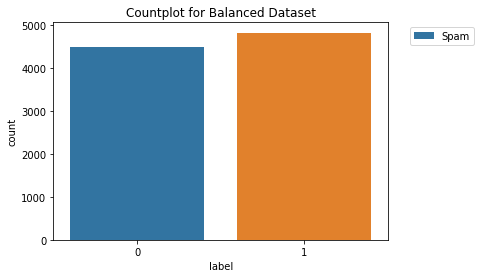

In [13]:
sns.countplot(x='label' ,data=data)
plt.title('Countplot for Balanced Dataset')
plt.legend(labels=['Spam', 'Ham'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Creating New Features

### Word-Count

In [14]:
data['wordCount'] = data['message'].apply(lambda x:len(x.split()))
data.head()

,label,message,wordCount
0,1,"Go until jurong point, crazy.. Available only ...",20
1,1,Ok lar... Joking wif u oni...,6
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,1,U dun say so early hor... U c already then say...,11
4,1,"Nah I don't think he goes to usf, he lives aro...",13


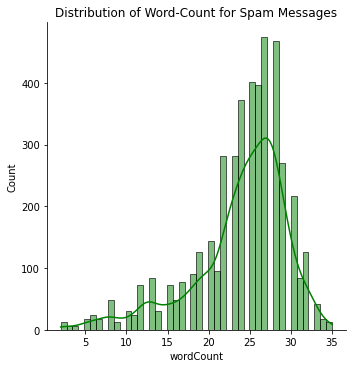

In [15]:
sns.displot(data=data[data['label']== 0].wordCount ,kde=True,color='green')
plt.title('Distribution of Word-Count for Spam Messages')
plt.show()

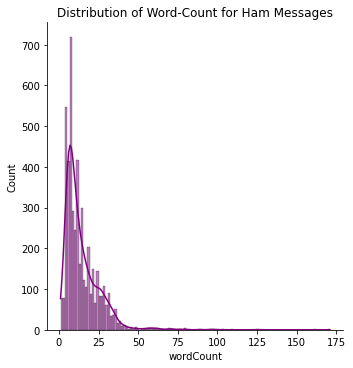

In [16]:
sns.displot(data=data[data['label'] == 1].wordCount, kde=True ,color='purple')
plt.title('Distribution of Word-Count for Ham Messages')
plt.show()


### Currency Symbol

In [17]:
def has_currency_symbol(x):
    currency_symbol = ['€','$','¥','£','₹']
    for i in currency_symbol:
        if i in x:
            return 1
    return 0 

data['has_currency_symbol'] = data['message'].apply(has_currency_symbol)

In [18]:
# sample spam message
data['message'].iloc[-1]

'This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [19]:
data.tail()

,label,message,wordCount,has_currency_symbol
5537,0,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,0,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,0,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,0,REMINDER FROM O2: To get 2.50 pounds free call...,28,0
5567,0,This is the 2nd time we have tried 2 contact u...,30,1


In [20]:
data.has_currency_symbol.value_counts()

0    7746
1    1561
Name: has_currency_symbol, dtype: int64

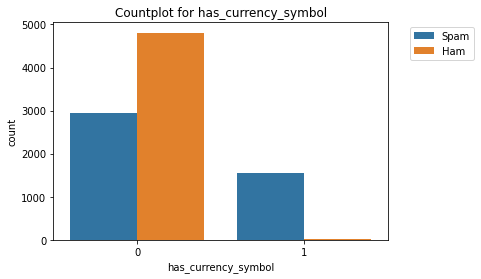

In [21]:
sns.countplot(x='has_currency_symbol' ,data=data,hue='label')
plt.title('Countplot for has_currency_symbol')
plt.legend(labels=['Spam', 'Ham'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Contains Number

In [22]:
def contains_number(x):
    for i in x:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

data['contains_number'] = data['message'].apply(contains_number)

In [23]:
# sample spam message
data['message'].iloc[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [24]:
data.head()

,label,message,wordCount,has_currency_symbol,contains_number
0,1,"Go until jurong point, crazy.. Available only ...",20,0,0
1,1,Ok lar... Joking wif u oni...,6,0,0
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,1,U dun say so early hor... U c already then say...,11,0,0
4,1,"Nah I don't think he goes to usf, he lives aro...",13,0,0


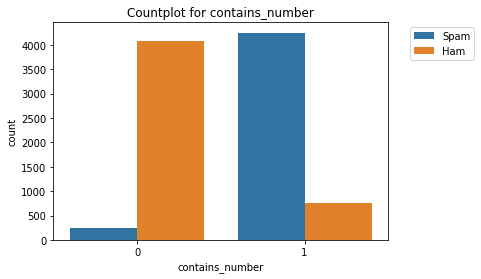

In [25]:
sns.countplot(x='contains_number', data=data, hue='label')
plt.title('Countplot for contains_number')
plt.legend(labels=['Spam', 'Ham'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# NLP

In [26]:
import nltk 
import re 
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

## Creating Corpus

In [27]:
corpus = []
lem = WordNetLemmatizer()

for string in list(data.message):
    # Removing special character and numbers using regular expression
    message = re.sub(pattern='[^a-zA-Z]' ,repl=' ',string=string)

    # converting entire text to lowercase
    message = message.lower()

    # tokenization --> breaking down the document i.e doc->sents->words
    words = message.split()

    # stop-word removal
    filterd_words = [word for word in words if word not in set(stopwords.words('english'))]

    # Lemmatization --> convert diff forms of same word into single word
    lemmatized_words = [lem.lemmatize(word) for word in filterd_words]

    # Join lemmatized words
    message = ' '.join(lemmatized_words)

    # append to corpus
    corpus.append(message)

## Creating Bag of Words

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer(max_features=500)

In [29]:
variables = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

In [30]:
X = pd.DataFrame(variables ,columns=feature_names)
y = data['label']

X.shape ,y.shape

((9307, 500), (9307,))

# Model Building

## Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((7445, 500), (1862, 500), (7445,), (1862,))

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report 

## Multinomial Naive Bayes 

In [33]:
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB()
mnb_cv = cross_val_score(mnb_model, X ,y ,scoring='f1' ,cv=10)
mnb_model.fit(X_train, y_train)

y_predict_mnb = mnb_model.predict(X_test)

In [34]:
print('Average F1-score of model : {}'.format(round(mnb_cv.mean(),3)))
print('Standard Deviation of model : {}\n'.format(round(mnb_cv.std(), 3)))

print('Classification-Report of Model :\n',classification_report(y_test ,y_predict_mnb))

Average F1-score of model : 0.947
Standard Deviation of model : 0.004

Classification-Report of Model :
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       903
           1       0.94      0.94      0.94       959

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



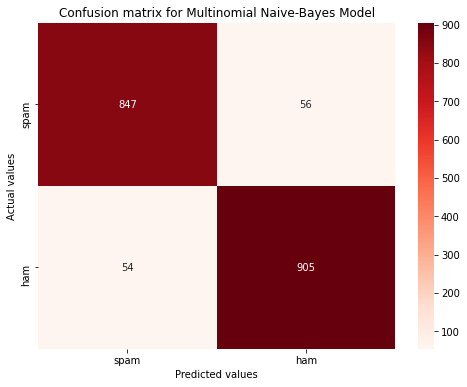

In [35]:
mnb_cf_matrix = confusion_matrix(y_test ,y_predict_mnb)

labels = ['spam', 'ham']

plt.figure(figsize=(8,6))
sns.heatmap(data=mnb_cf_matrix, annot=True, cmap='Reds',xticklabels=labels, yticklabels=labels,fmt='.3g')

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion matrix for Multinomial Naive-Bayes Model')
plt.show()


## Random forest Classifier 

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=10)
rfc_cv = cross_val_score(rfc_model, X, y, scoring='f1', cv=10)
rfc_model.fit(X_train, y_train)

y_predict_rfc = rfc_model.predict(X_test)

In [37]:
print('Average F1-score of model : {}'.format(round(rfc_cv.mean(), 3)))
print('Standard Deviation of model : {}\n'.format(round(rfc_cv.std(), 3)))

print('Classification-Report of Model :\n',classification_report(y_test, y_predict_rfc))

Average F1-score of model : 0.991
Standard Deviation of model : 0.004

Classification-Report of Model :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       1.00      0.98      0.99       959

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



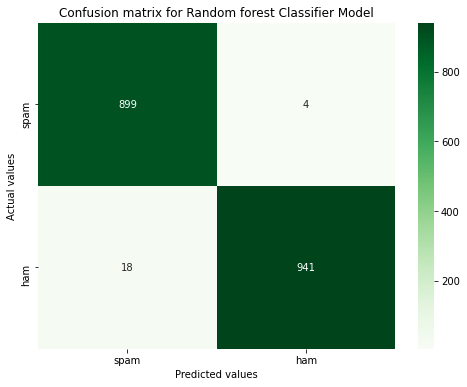

In [38]:
rfc_cf_matrix = confusion_matrix(y_test, y_predict_rfc)

labels = ['spam' ,'ham']

plt.figure(figsize=(8, 6))
sns.heatmap(data=rfc_cf_matrix, annot=True, cmap='Greens',xticklabels=labels, yticklabels=labels,fmt='.3g')

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion matrix for Random forest Classifier Model')
plt.show()


## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_cv = cross_val_score(dt_model, X, y, scoring='f1', cv=10)
dt_model.fit(X_train, y_train)

y_predict_dt = dt_model.predict(X_test)

In [40]:
print('Average F1-score of model : {}'.format(round(dt_cv.mean(), 3)))
print('Standard Deviation of model : {}\n'.format(round(dt_cv.std(), 3)))
print('Classification-Report of Model :\n',classification_report(y_test, y_predict_dt))

Average F1-score of model : 0.982
Standard Deviation of model : 0.003

Classification-Report of Model :
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       903
           1       1.00      0.97      0.98       959

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



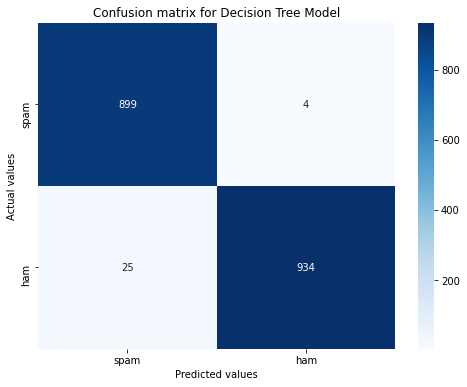

In [41]:
dt_cf_matrix = confusion_matrix(y_test, y_predict_dt)

labels = ['spam', 'ham']

plt.figure(figsize=(8, 6))
sns.heatmap(data=dt_cf_matrix, annot=True, cmap='Blues',xticklabels=labels, yticklabels=labels, fmt='.3g')

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion matrix for Decision Tree Model')
plt.show()

# Model Evaluation

In [42]:
models = pd.DataFrame({
    'Model': ['Multinomial Naive-Bayes', 'Random Forest', 'Decision Tree'],
    'F1-Score': [
        round(mnb_cv.mean(), 3),
        round(rfc_cv.mean(), 3),
        round(dt_cv.mean(), 3)
        ]
})

models.sort_values(by='F1-Score', ascending=False)

,Model,F1-Score
1,Random Forest,0.991
2,Decision Tree,0.982
0,Multinomial Naive-Bayes,0.947
